# R2 score with linear regressor was in 70% so trying to train artifical neural network for better results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# convert the csv file into data frame
insurance_df = pd.read_csv("insurance.csv")

In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# says no null values so making sure every column is in integer or float format
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [5]:
insurance_df['sex'] = insurance_df['sex'].apply(lambda x : 0 if x=='female' else 1)

In [6]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [7]:
# change smoker column as well
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x=='no' else 1)

In [10]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
# lets see for unique values of regions and see if we can assign numeric values to it
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
# here there are 4 values so we try to create a seperate column for each region we will use get_dummies also lets delete teh regions that are higly correlated y setting drop_first = True
region_dummies = pd.get_dummies(insurance_df['region'],drop_first = True)

In [13]:
region_dummies.head()

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [14]:
# convert the boolena values to integer values 0 & 1
region_dummies = region_dummies.astype(int)

In [15]:
region_dummies.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [16]:
# lets concatinate the dummy values to the actual dataframe that we make sure the region values are in numerical representation
insurance_df = pd.concat([insurance_df,region_dummies],axis = 1) # concatinating by column so axis = 1

In [17]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [18]:
# now we dont need the region column so drop it
insurance_df.drop(['region'],axis = 1,inplace = True)

In [19]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   int64  
 7   southeast  1338 non-null   int64  
 8   southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [20]:
# ok now everything is in numerical format

# also the data has been already visualized . Can refer it in medicalInsurancePremiumPredictor

# Create Train and test data sets 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# out column to poredict is charges
y = insurance_df['charges']

In [23]:
# rest of the columns except the charges column are inputs
X = insurance_df.drop(['charges'],axis = 1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   northwest  1338 non-null   int64  
 6   southeast  1338 non-null   int64  
 7   southwest  1338 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 83.8 KB


In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
# converting X and y to numpy arrays
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [28]:
type(X)

numpy.ndarray

In [29]:
type(y)

numpy.ndarray

In [32]:
X.shape

(1338, 8)

In [33]:
y.shape

(1338,)

In [34]:
# scale the data to standard format 
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

# standard sclaer takes 2d array as input so Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# since y has single feature 
y = y.reshape(-1,1)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [35]:
# test set size will be 20% of actual data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [36]:
# verifying if then test and train set size adds upto original data size
X_train.shape

(1070, 8)

In [37]:
X_test.shape

(268, 8)

In [38]:
y_train.shape

(1070, 1)

In [39]:
y_test.shape

(268, 1)

In [40]:
# data preparation is done . Now moving on to training a artificial neural network

# Artificial Neural Network Based Regression Model

In [41]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [47]:
# number of input features is 
X.shape[1]

8

In [48]:
# here we will build dense neural network where every neron will connected to eaxh other
# drop out to make sure network is not overfitting the training data
# we use relu activation function
# Adam optimizer is used to train model
ANN_model = keras.Sequential() # neural network here is in sequential fashion. input from one layer passed to next layer
ANN_model.add(Dense(50,input_dim = 8)) # 50 neurons with input of 8 features 
ANN_model.add(Activation('relu'))
# next layer with 150 neurons
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25)) #25% neurons aare dropped out

# next layer 
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25))

# next layer 
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))  # we are predicting a regression value so the activation function used is linear

# last layer
ANN_model.add(Dense(1))

# Compile the model
ANN_model.compile(loss = 'mse', optimizer='adam')

# get summary of the model
ANN_model.summary()

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# fit the artificial model with training data
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7160 - val_loss: 0.2658
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2814 - val_loss: 0.2380
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2218 - val_loss: 0.1752
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1982 - val_loss: 0.1621
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1772 - val_loss: 0.1619
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1967 - val_loss: 0.1702
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1683 - val_loss: 0.1500
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2034 - val_loss: 0.1691
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1575 - val_loss: 0.1558
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1951 - val_loss: 0.1659
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1480 - val_loss: 0.1717
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1

In [50]:
# loss value improved so model looks good
# evaluate the result
result = ANN_model.evaluate(X_test,y_test)
accuracy_ANN = 1-result
print('Accuracy : {}'.format(accuracy_ANN))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2171 
Accuracy : 0.797929659485817


In [51]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

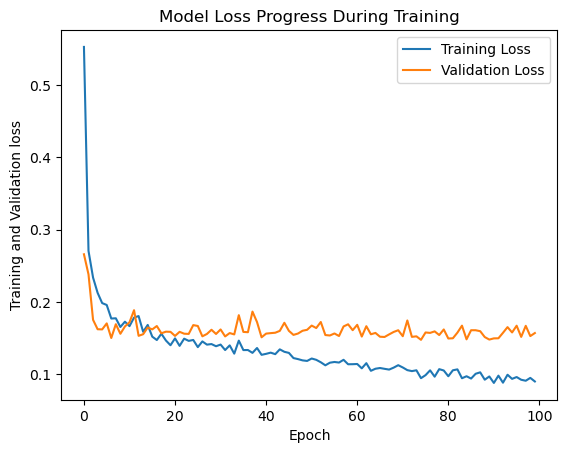

In [52]:
# trying to plot the loss and validation loss 
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss Progress During Training")
plt.xlabel('Epoch')
plt.ylabel('Training and Validation loss')
plt.legend(['Training Loss','Validation Loss'])
        

In [53]:
# here loss started high and went low
# validation loss started high but later it pretty much froze => kind of overfitting

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


Text(0, 0.5, 'True Values')

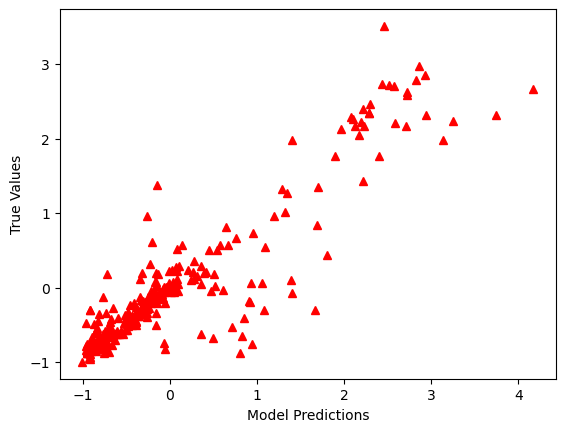

In [54]:
# lets go ahead and predict the output
y_predict = ANN_model.predict(X_test)
plt.plot(y_test,y_predict,"^",color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
# if the model is working fine we need to see a proper 45 degree line between predicted and test values


In [55]:
# we see the decent line here

In [57]:
# now convert the values to their original format of dollors
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

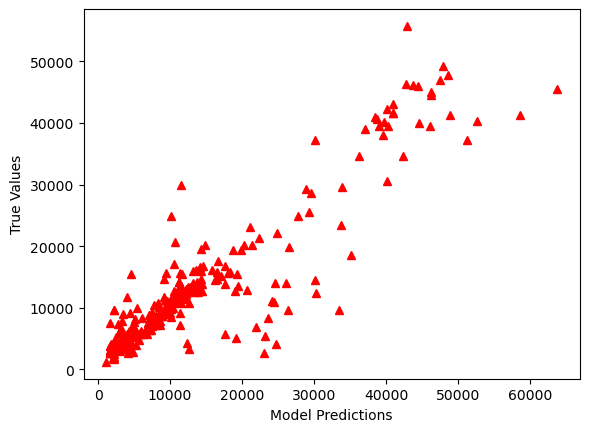

In [58]:
# lets draw the same graph
plt.plot(y_test_orig, y_predict_orig, "^" , color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Values")

In [60]:
# lets go ahead and calculate the metrics
k = X_test.shape[1] # number of input variables
n = len(X_test) # number of data samples used

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

MSE = mean_squared_error(y_test_orig,y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
RMSE = float(format(np.sqrt(MSE),'.3f'))
r2 = r2_score(y_test_orig,y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE = ',RMSE,'\nMSE = ',MSE, '\nMAE = ',MAE,'\nR2 = ',r2,'\nadj_r2 = ',adj_r2)

RMSE =  5441.686 
MSE =  29611944.0 
MAE =  3068.6240234375 
R2 =  0.8260568380355835 
adj_r2 =  0.8206840762760649
